In [386]:
import tensorflow as tf
import keras
import numpy as np
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam

import glob, os
import PIL.Image

import csv
import pandas as pd
import seaborn as sns

In [387]:
all_labels = {}
with open("/Users/leon/Downloads/SCUT-FBP5500_v2/All_Ratings.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in tqdm(csv_reader):
        if line_count == 0:
            line_count += 1
        else:
            line_count += 1
            all_labels[row[1].split(".")[0]] = row[2]

330001it [00:00, 770805.43it/s]


In [388]:
def to_array(i):
    out = np.zeros(5)
    out[i] = 1
    return (i - 2) 

In [389]:
path = "/Users/leon/Downloads/SCUT-FBP5500_v2/Scaled/"
valid_images = ".png"
images = []
labels = []
for f in tqdm(os.listdir(path)):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f).convert('L')
        images.append(np.array(img))
        labels.append(to_array(int(all_labels[f[:-7]]) - 1))
        
images = np.array(images).reshape(-1,1,128,128)
labels = np.array(labels)

100%|██████████| 1982/1982 [00:04<00:00, 435.60it/s]


In [390]:
print(labels)

[ 0  0  0 ...  2 -1  0]


In [391]:
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.25, random_state=42)

In [392]:
model = Sequential()
model.add(keras.layers.Conv2D(16, [3,3], activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, [3,3], activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, [3,3], activation='relu', padding='same'))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.add(keras.layers.Activation('sigmoid'))

In [393]:
opt = keras.optimizers.RMSprop(0.001)
model.compile(loss="mse", optimizer=opt, metrics=['mae', 'mse'])

In [394]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [ ]:
example_batch = trainX[:10]
example_result = model.predict(example_batch)
print(example_result)

In [ ]:
# train the neural network
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=1000, batch_size=20)
train_mse = model.evaluate(trainX, trainY, verbose=0)
test_mse = model.evaluate(testX, testY, verbose=0)

Train on 1485 samples, validate on 496 samples
Epoch 1/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.7165 - mae: 0.5601 - mse: 0.7165 - val_loss: 0.8195 - val_mae: 0.6156 - val_mse: 0.8195
Epoch 2/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.7113 - mae: 0.5568 - mse: 0.7113 - val_loss: 0.7376 - val_mae: 0.5898 - val_mse: 0.7376
Epoch 3/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.6779 - mae: 0.5385 - mse: 0.6779 - val_loss: 0.9948 - val_mae: 0.6898 - val_mse: 0.9948
Epoch 4/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.6600 - mae: 0.5279 - mse: 0.6600 - val_loss: 0.7566 - val_mae: 0.5850 - val_mse: 0.7566
Epoch 5/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.7017 - mae: 0.5611 - mse: 0.7017 - val_loss: 0.9810 - val_mae: 0.6904 - val_mse: 0.9810
Epoch 6/1000
1485/1485 [==============================] - 2s 1ms/step - loss: 0.6464 - mae: 0.5219 - mse: 0.6464 

1


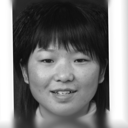

In [396]:
pred = all_labels["AF14"]
img = PIL.Image.open(path + "AF14_01.png").convert('L')
print(pred)
display(img)

In [397]:
print(model.predict(example_batch))

[[0.0000000e+00]
 [9.9999923e-01]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.3484230e-05]
 [9.8977417e-01]
 [9.9999988e-01]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]
